In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)


In [2]:
df = pd.read_csv('bmw.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
df.shape

(10781, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(117)

In [9]:
df.drop_duplicates(inplace=True)

In [27]:
#unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

model: 24
year: 25
price: 3777
transmission: 3
mileage: 8086
fuelType: 5
tax: 38
mpg: 102
engineSize: 17


In [12]:
#selecting numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

In [13]:
#correlation matrix
correlation = df[numerical_columns].corr()
correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623754,-0.772761,0.025393,-0.070185,-0.022398
price,0.623754,1.000000,-0.605473,0.264178,-0.203986,0.461750
mileage,-0.772761,-0.605473,1.000000,-0.171236,0.117014,-0.006961
tax,0.025393,0.264178,-0.171236,1.000000,-0.351837,0.431361
mpg,-0.070185,-0.203986,0.117014,-0.351837,1.000000,-0.402058
engineSize,-0.022398,0.461750,-0.006961,0.431361,-0.402058,1.000000


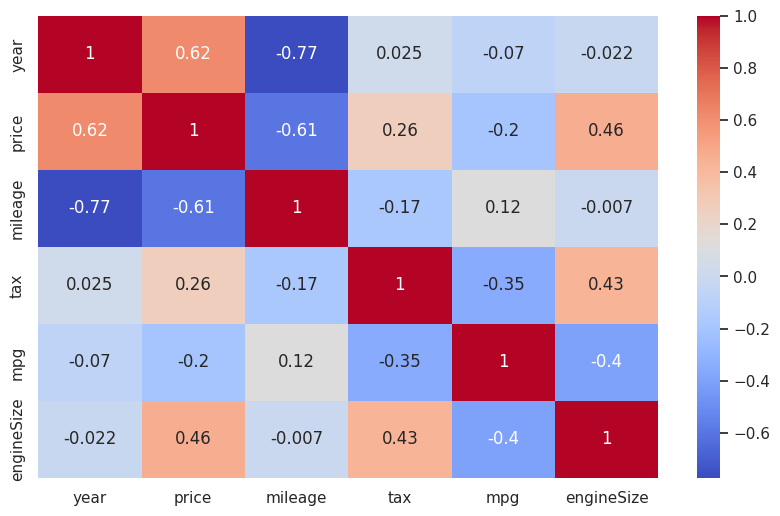

In [18]:
#heatmap of correlation
plt.figure(figsize=[10, 6])
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

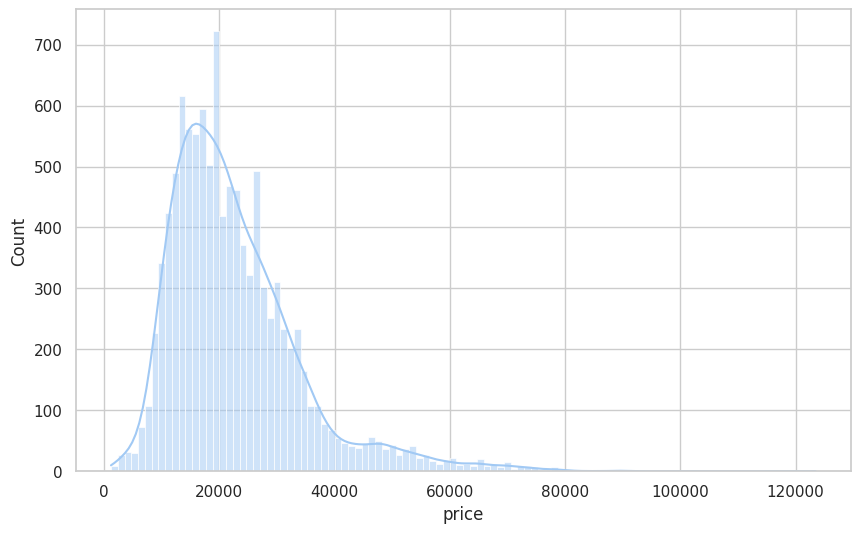

In [20]:
#Distribution of Price with histplot
plt.figure(figsize=[10, 6])
sns.histplot(df['price'], kde=True)
plt.show()

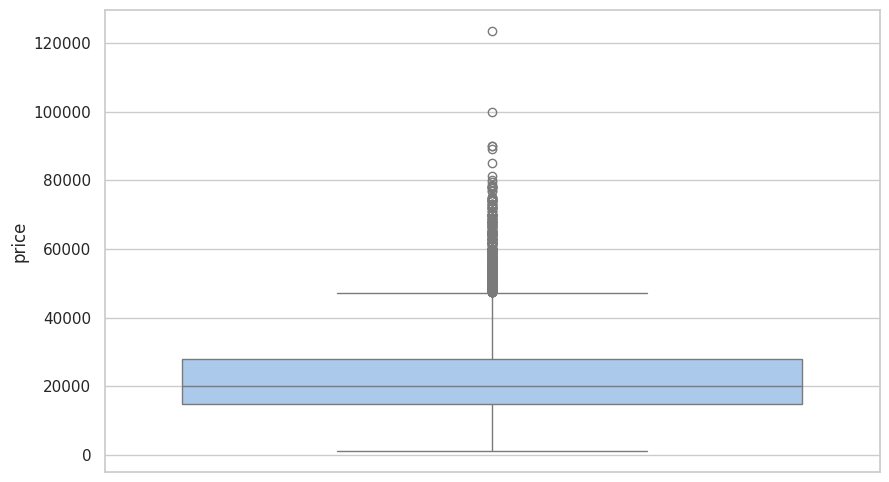

In [21]:
#Distribution of Price with boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(df['price'])
plt.show()

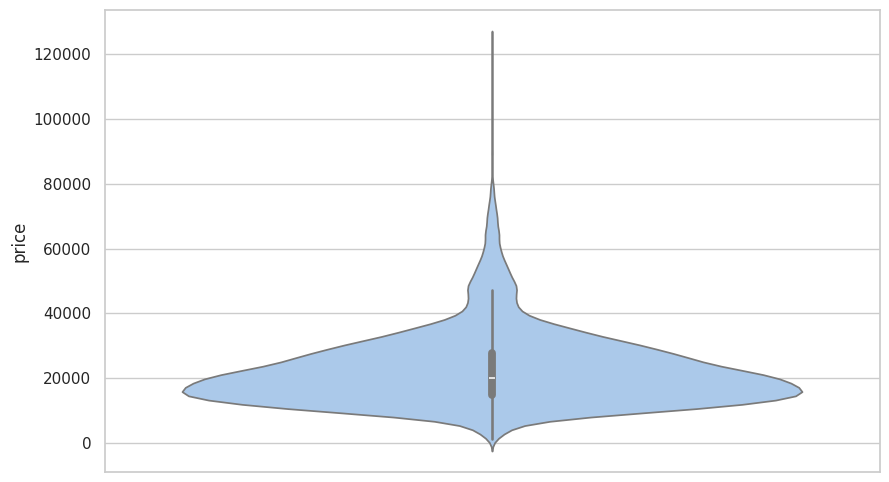

In [22]:
# Violin plot of Price
plt.figure(figsize=[10, 6])
sns.violinplot(df['price'])
plt.show()

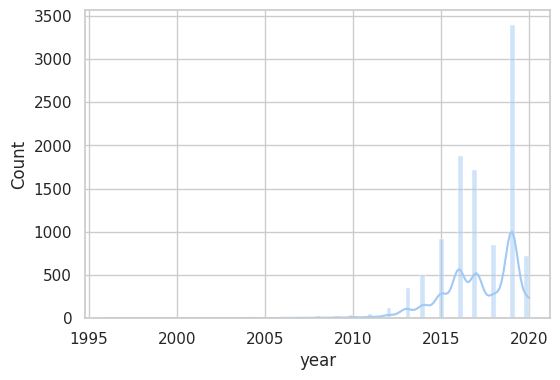

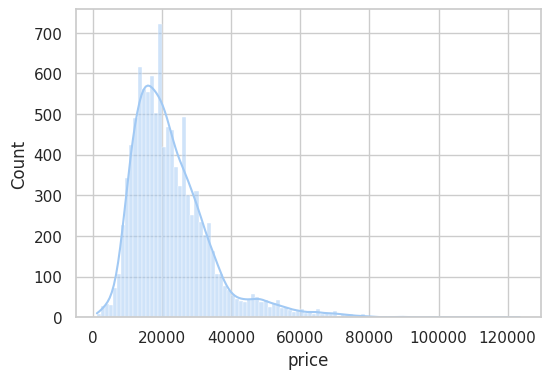

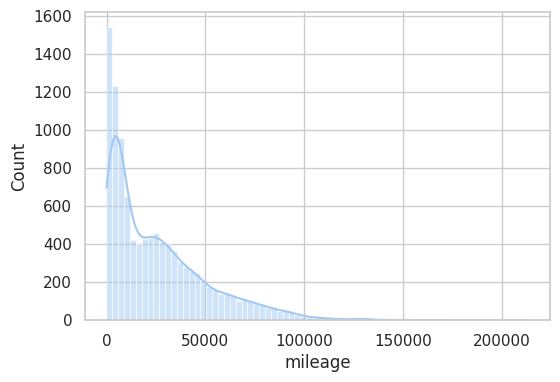

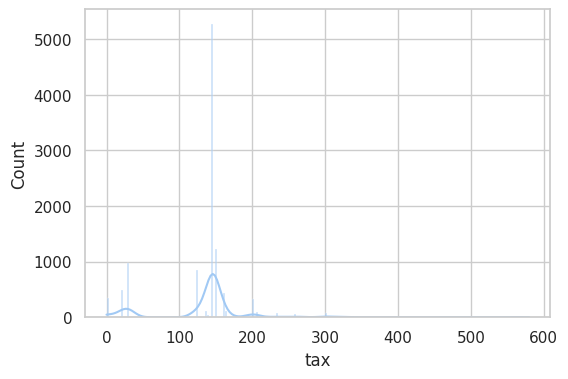

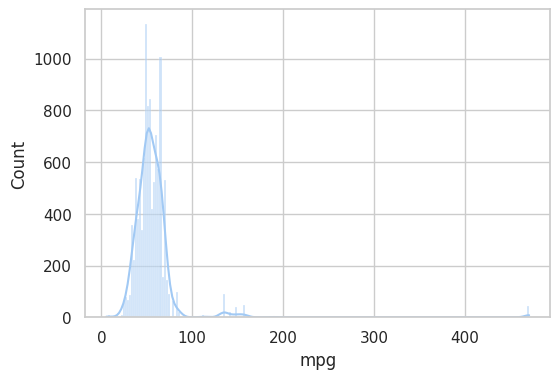

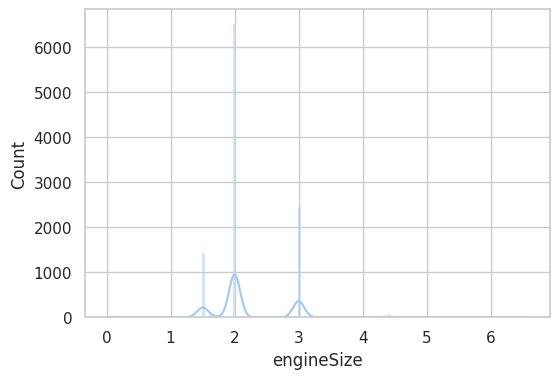

In [25]:
#histplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=[6, 4])
    sns.histplot(df[col], kde=True)
    plt.show()

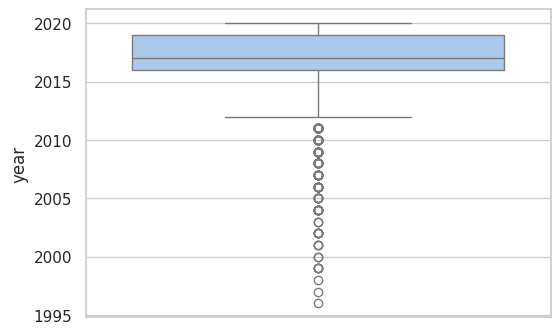

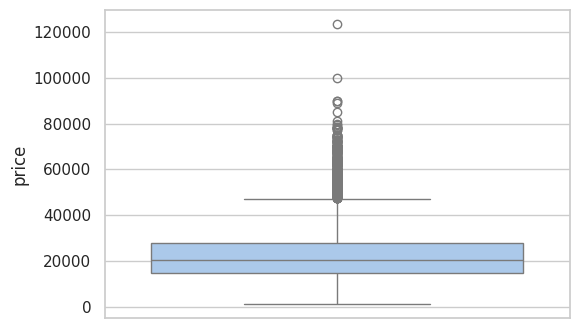

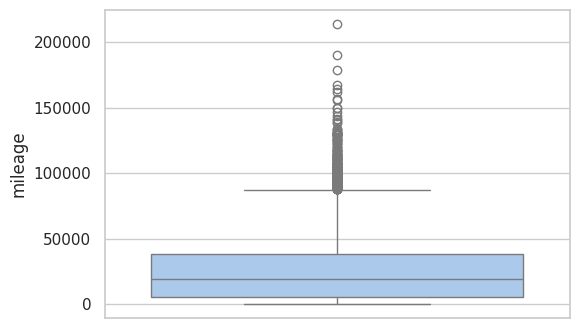

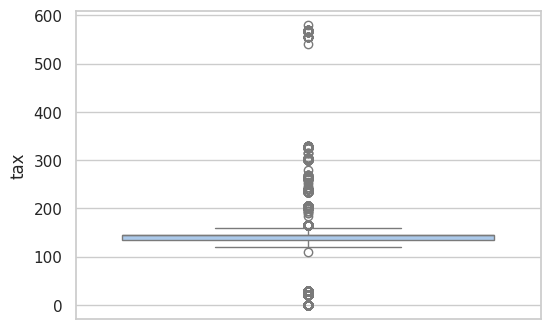

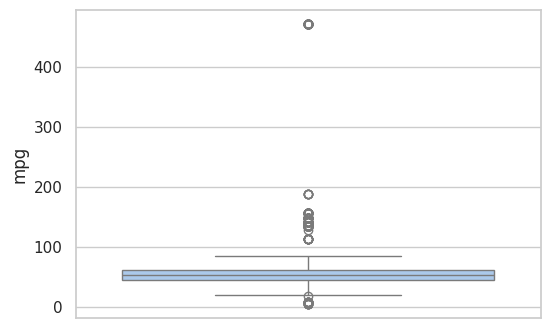

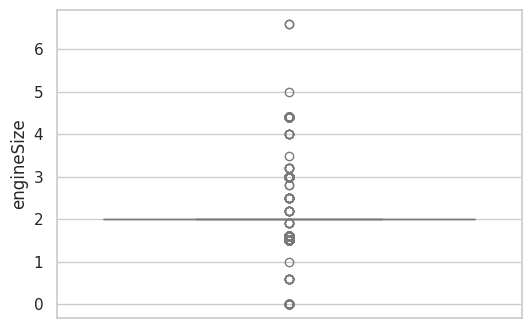

In [28]:
#boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=[6, 4])
    sns.boxplot(df[col])
    plt.show()

<Figure size 1000x600 with 0 Axes>

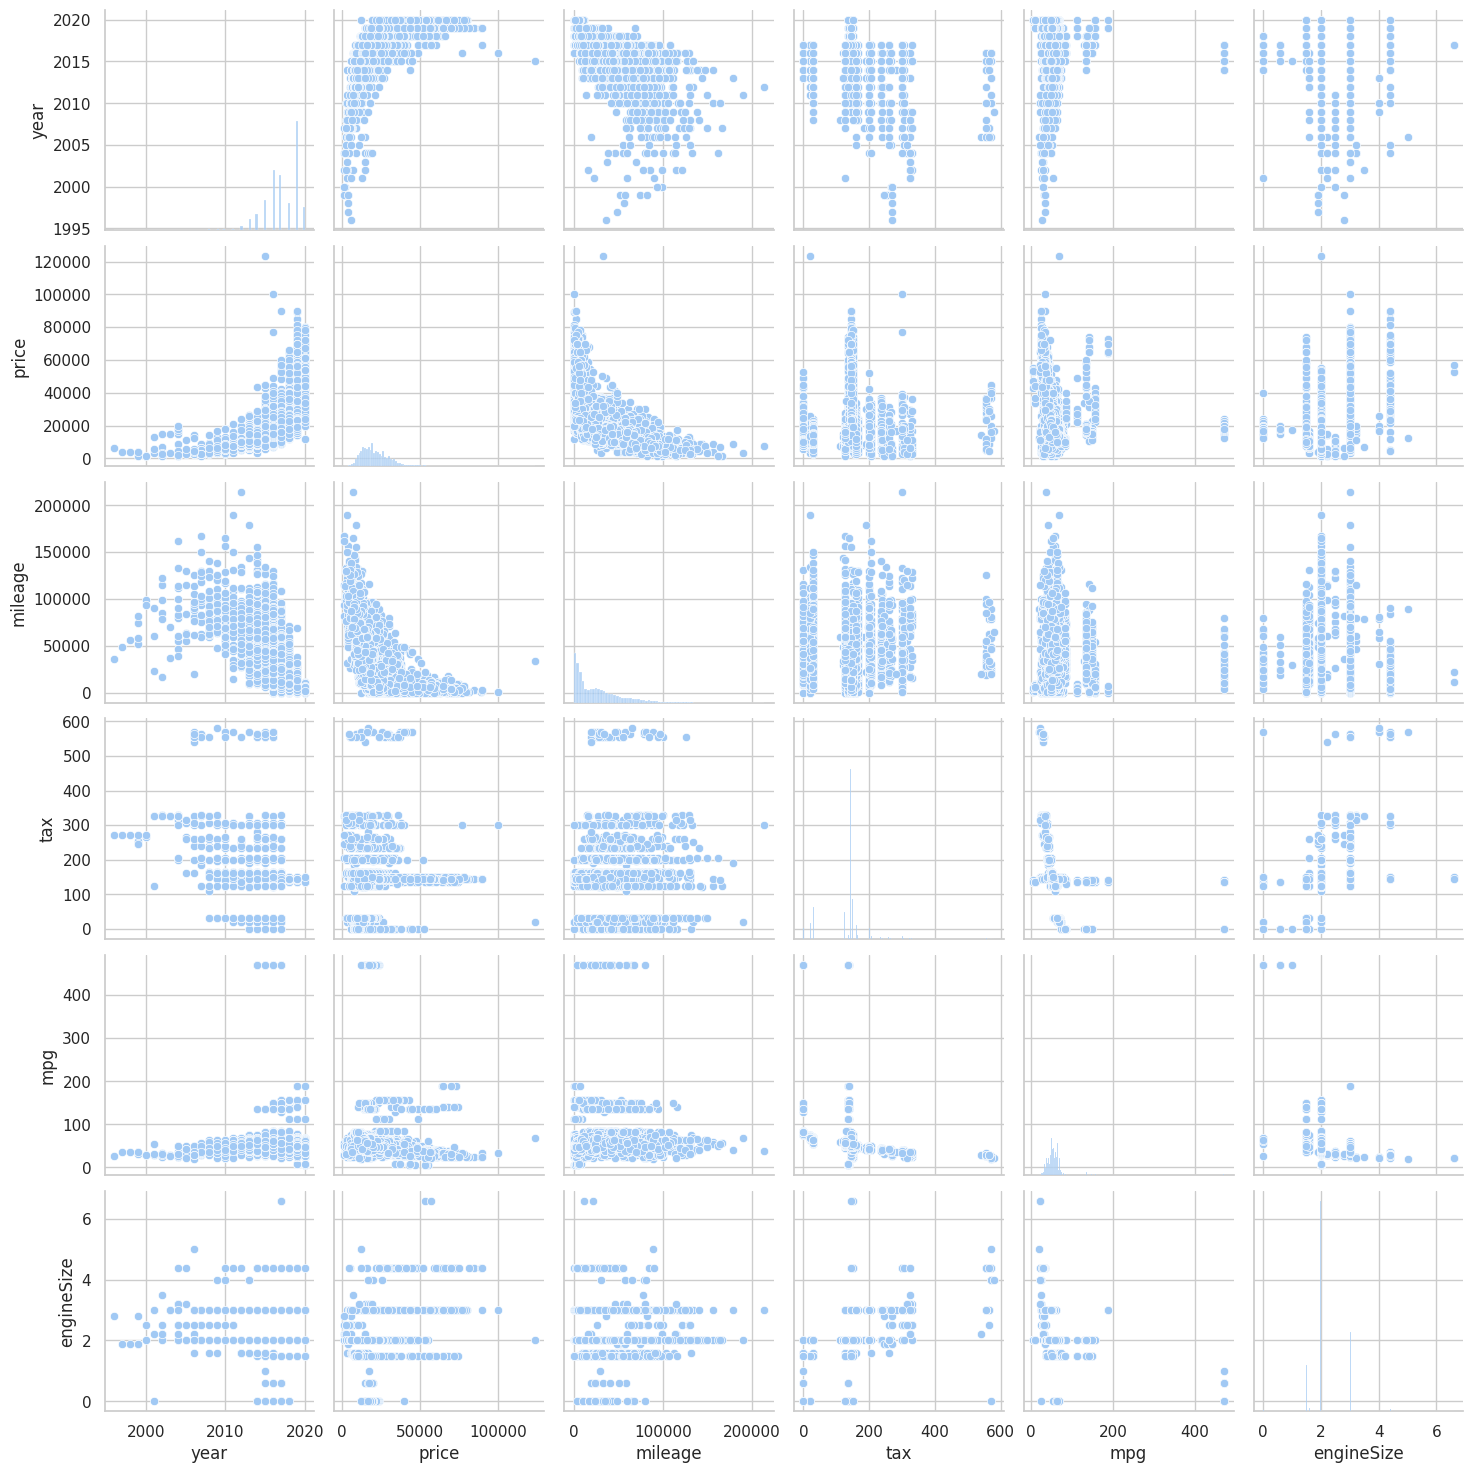

In [29]:
#Pairwise scatter plots (Pairplot) of numerical features
plt.figure(figsize=[10, 6])
sns.pairplot(df[numerical_columns])
plt.show()

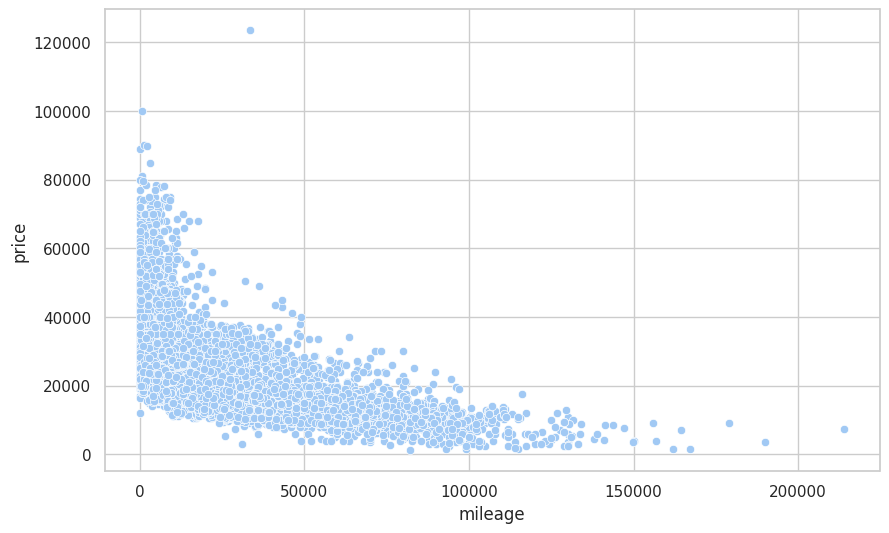

In [34]:
#scatter plot: Price vs Mileage
plt.figure(figsize=[10, 6])
sns.scatterplot(x='mileage', y='price', data=df)
plt.show()

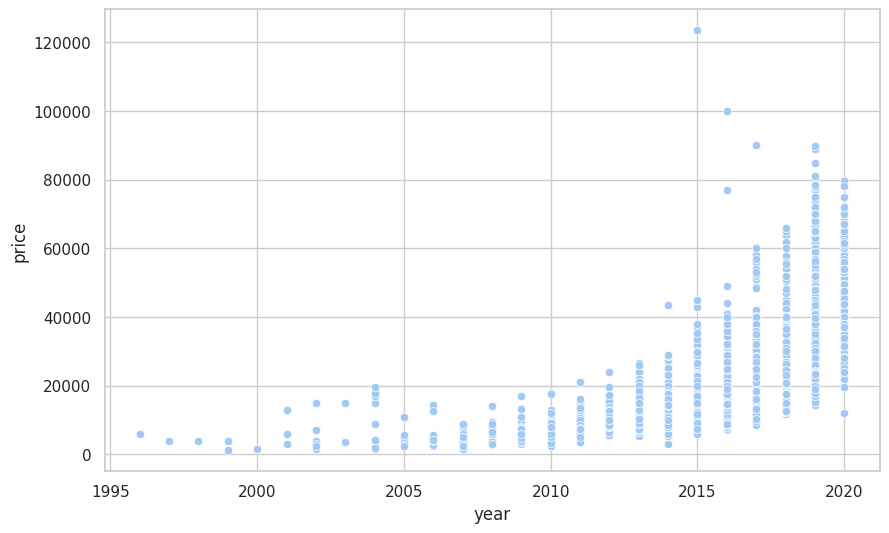

In [38]:
#scatter plot: Price vs Year
plt.figure(figsize=[10, 6])
sns.scatterplot(x='year', y='price', data=df)
plt.show()

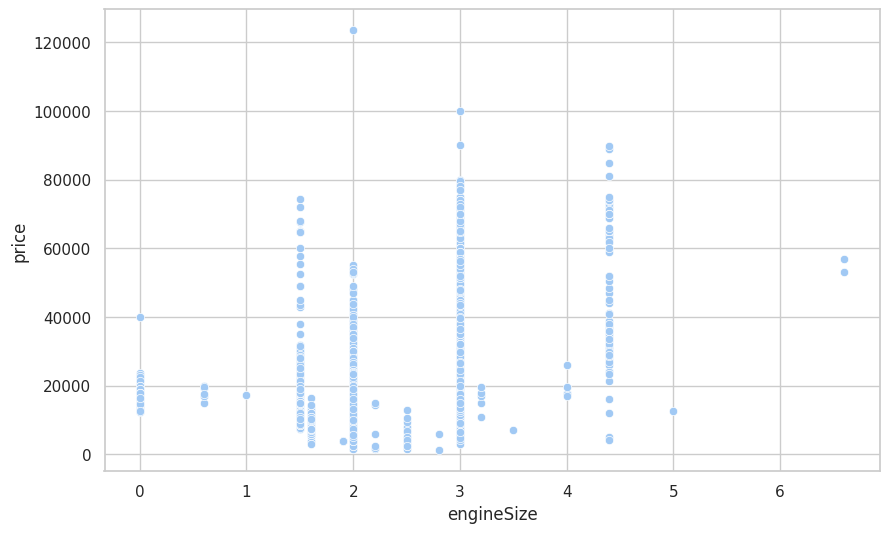

In [39]:
#scatter plot: Price vs Engine Size
plt.figure(figsize=[10, 6])
sns.scatterplot(x='engineSize', y='price', data=df)
plt.show()

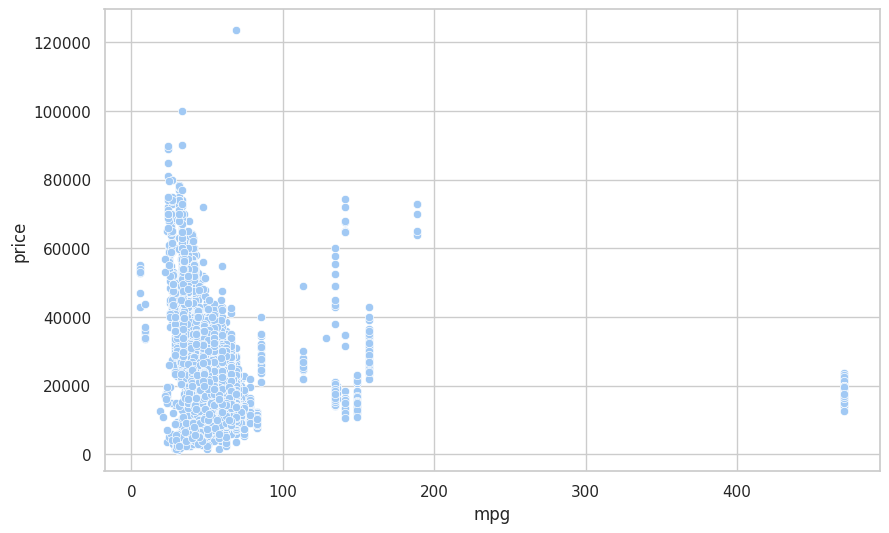

In [41]:
#scatter plot: Price vs MPG
plt.figure(figsize=[10, 6])
sns.scatterplot(x='mpg', y='price', data=df)
plt.show()

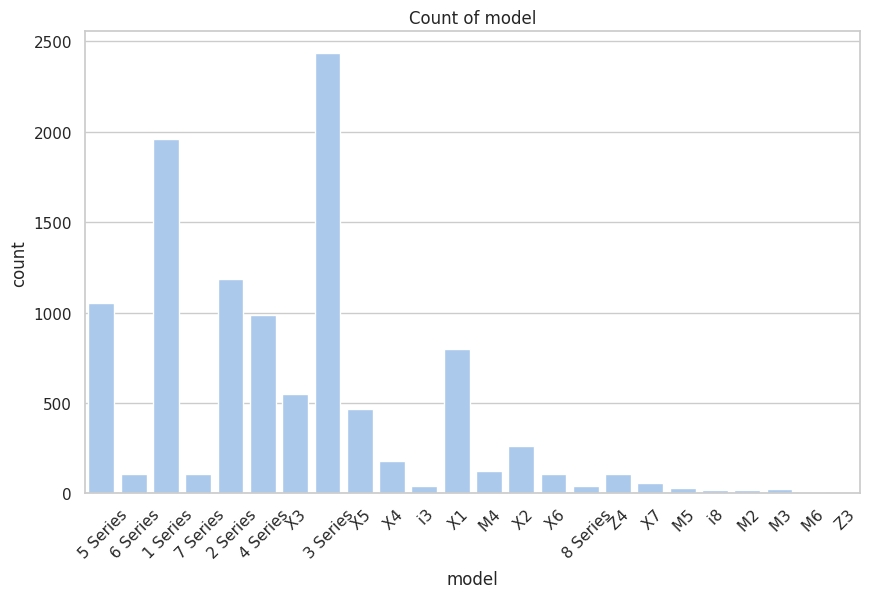

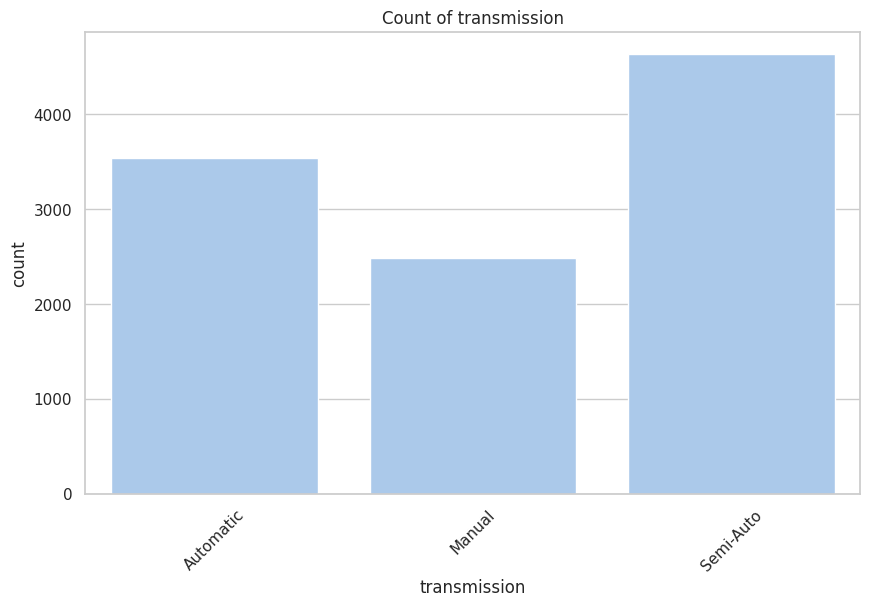

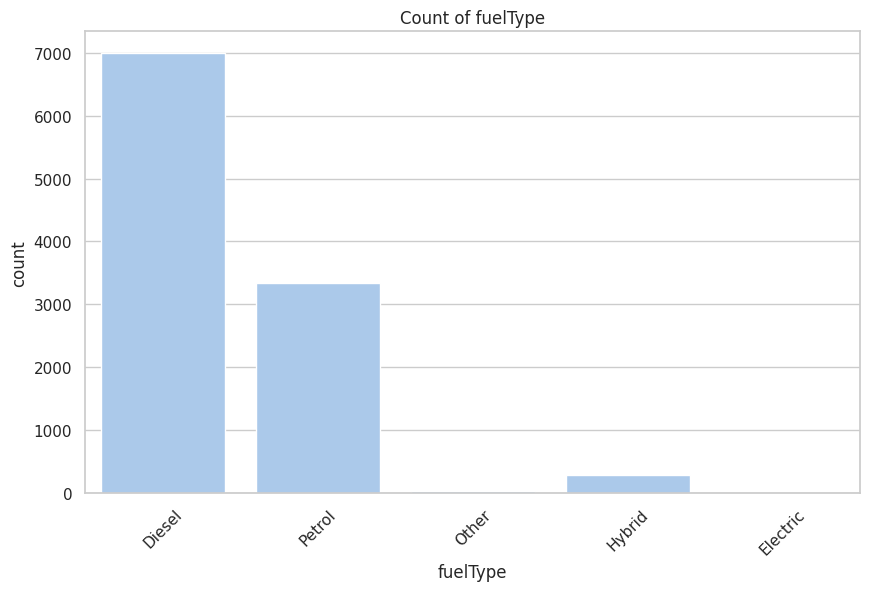

In [66]:
#count plot for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

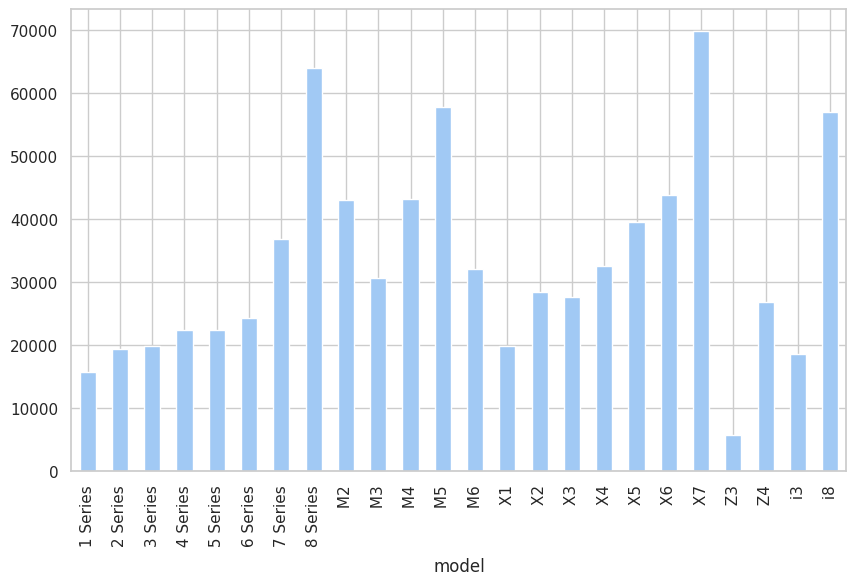

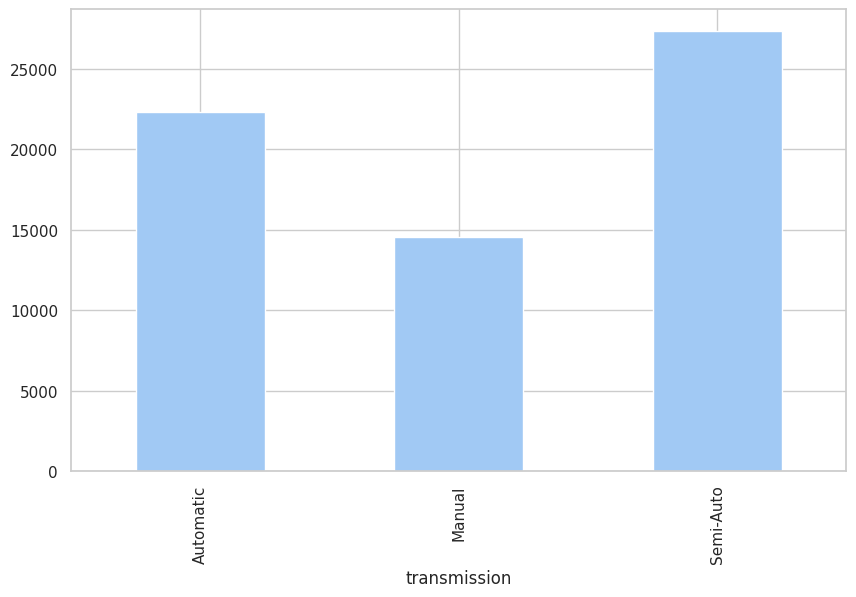

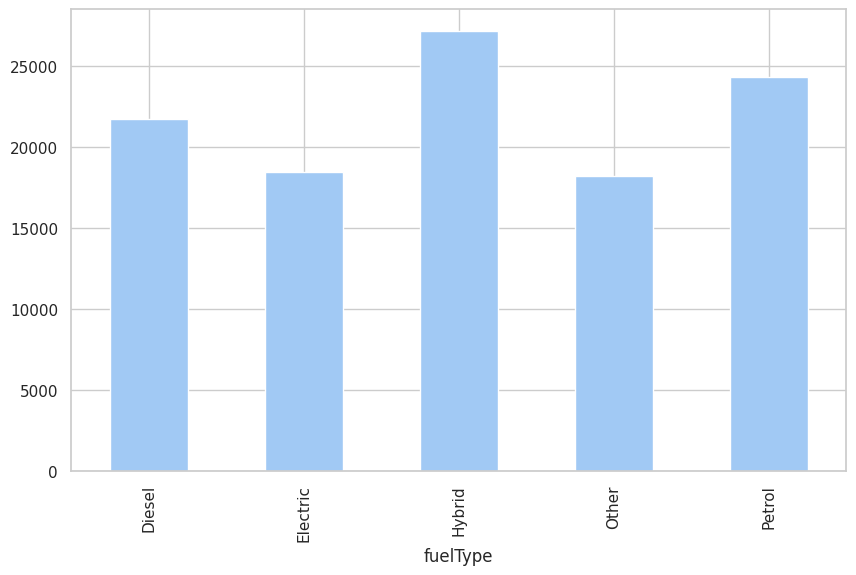

In [49]:
#Avarage price for each categorical column
for col in categorical_columns:
    plt.figure(figsize=[10, 6])
    df.groupby(col)['price'].mean().plot(kind='bar')
    plt.show()

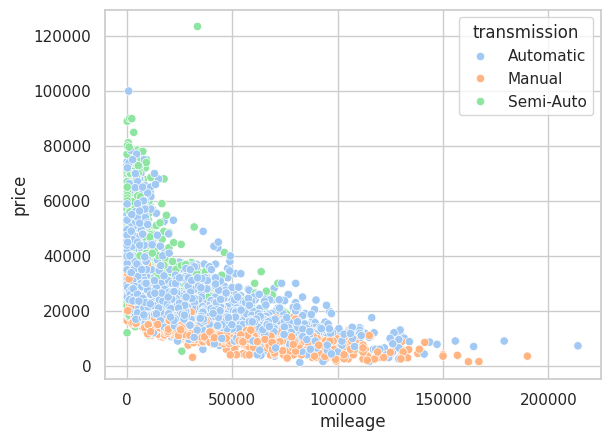

In [52]:
#scatter plot with hue transmission
sns.scatterplot(x='mileage', y='price', hue='transmission', data=df)
plt.show()

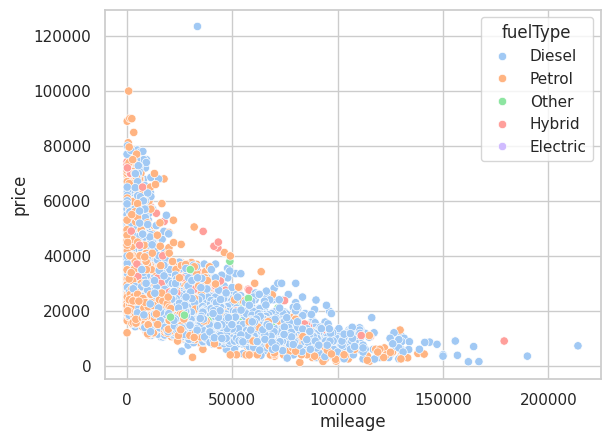

In [56]:
#scatter plot with hue fuelType
sns.scatterplot(x='mileage', y='price', hue='fuelType', data=df)
plt.show()

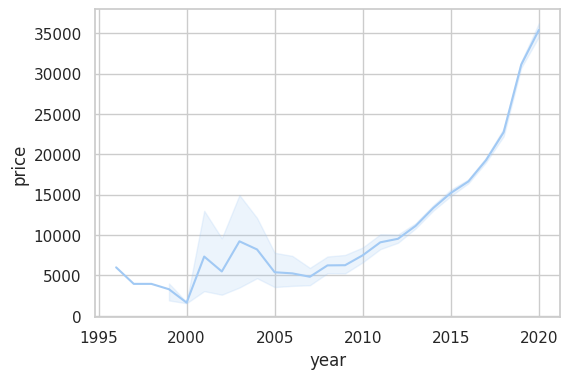

In [58]:
#Line plot: Average Price by Year
plt.figure(figsize=[6, 4])
sns.lineplot(x='year', y='price', data=df)
plt.show()

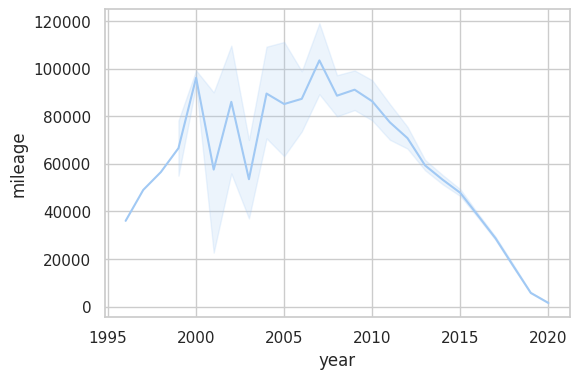

In [59]:
# Line plot: Average Mileage by Year
plt.figure(figsize=[6, 4])
sns.lineplot(x='year', y='mileage', data=df)
plt.show()

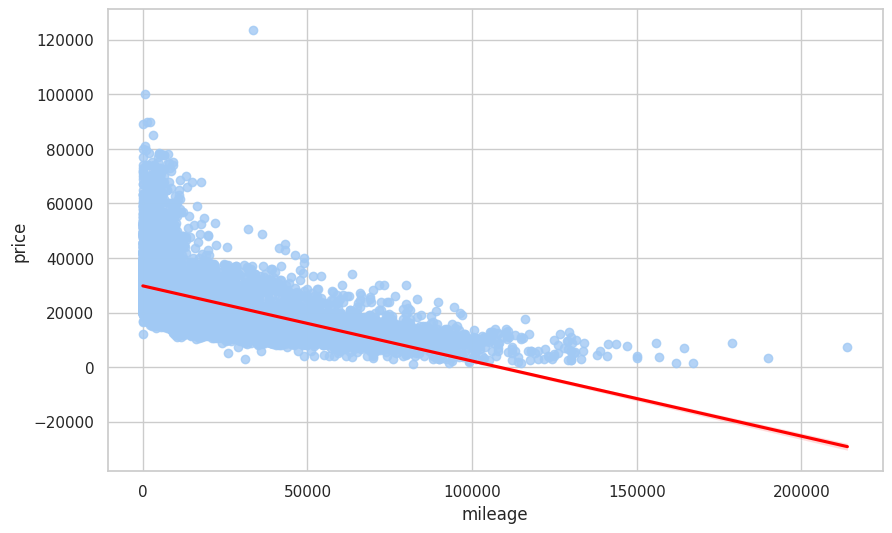

In [63]:
#regression plot of mileage vs price
plt.figure(figsize=[10, 6])
sns.regplot(x='mileage', y='price', data=df, line_kws={'color': 'red'})
plt.show()

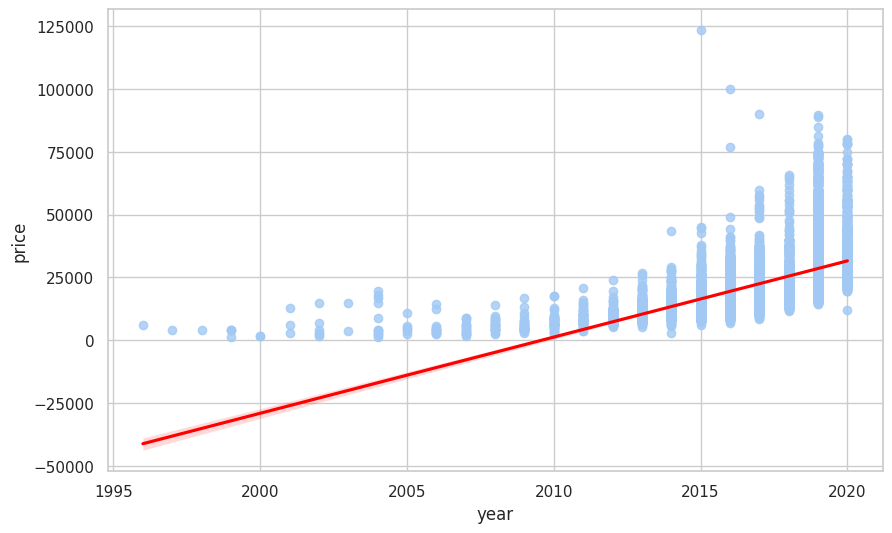

In [64]:
#regression plot of year vs price
plt.figure(figsize=[10, 6])
sns.regplot(x='year', y='price', data=df, line_kws={'color': 'red'})
plt.show()

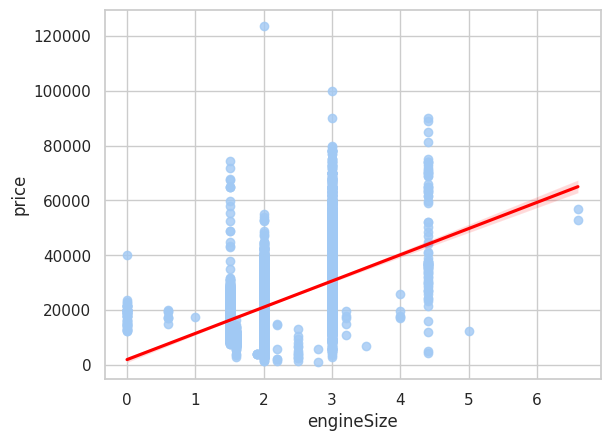

In [65]:
#regression plot of engine size vs price
sns.regplot(x='engineSize', y='price', data=df, line_kws={'color': 'red'})
plt.show()